In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

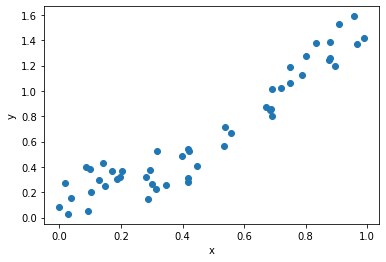

In [2]:
np.random.seed(1)
X = np.random.rand(50,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(50,1)
fig = plt.figure()
plt.scatter(X,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

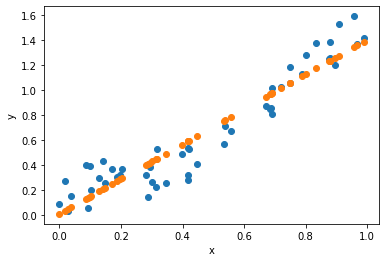

0.8919326382437994

In [8]:
model1 = LinearRegression()
model1.fit(X,y)
output = model1.predict(X)
fig = plt.figure()
plt.scatter(X,y,label='data')
plt.scatter(X, output, label="predictions")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
display(model1.score(X,y))

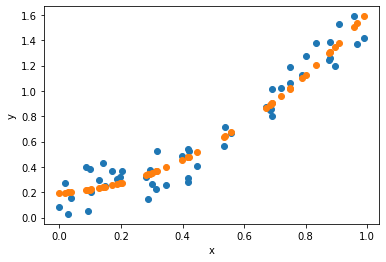

0.937213227713278

In [9]:
X_deg2 = np.hstack([X,X**2])
model1 = LinearRegression()
model1.fit(X_deg2,y)
output = model1.predict(X_deg2)
fig = plt.figure()
plt.scatter(X,y,label='data')
plt.scatter(X, output, label="predictions")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
display(model1.score(X_deg2,y))

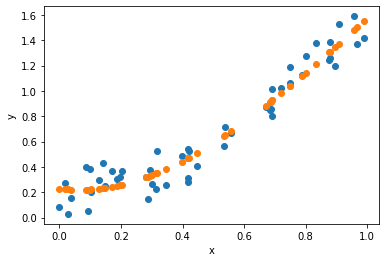

0.9384895307987051

In [10]:
X_deg3 = np.hstack([X,X**2,X**3])
model1 = LinearRegression()
model1.fit(X_deg3,y)
output = model1.predict(X_deg3)
fig = plt.figure()
plt.scatter(X,y,label='data')
plt.scatter(X, output, label="predictions")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
display(model1.score(X_deg3,y))

# Inbuilt Methodologies

In [11]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
scaler = StandardScaler()
poly = PolynomialFeatures()

In [20]:
poly = PolynomialFeatures(2) # polynomial features upto degree 2
X_poly = poly.fit_transform(X)
X_poly_scaled = scaler.fit_transform(X_poly)

model = LinearRegression()
model.fit(X_poly_scaled, y)

print(model.score(X_poly_scaled, y))

0.937213227713278


In [22]:
poly = PolynomialFeatures(3) # polynomial features upto degree 2
X_poly = poly.fit_transform(X)
X_poly_scaled = scaler.fit_transform(X_poly)

model = LinearRegression()
model.fit(X_poly_scaled, y)

print(model.score(X_poly_scaled, y))

0.9384895307987051


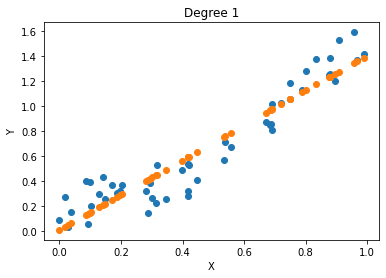

0.8919326382437994

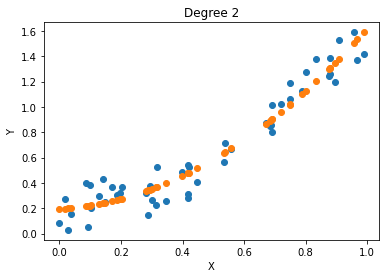

0.937213227713278

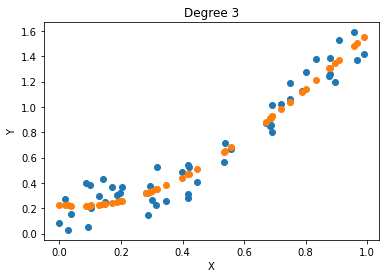

0.9384895307987051

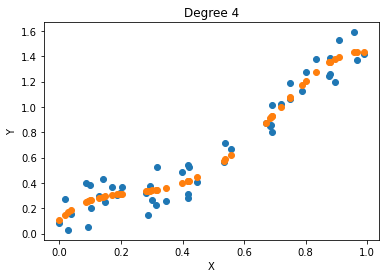

0.9509958355607927

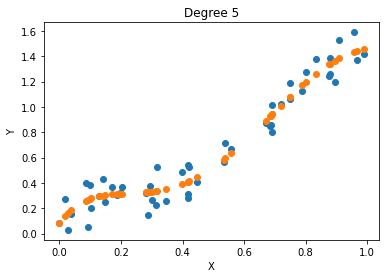

0.9515258649694077

In [24]:
scores = []
for i in range(1,6):
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(X)
    scaler = StandardScaler()
    scaler.fit(X_poly)
    X_poly_scaled = scaler.transform(X_poly)
    model = LinearRegression()
    model.fit(X_poly_scaled,y)
    output = model.predict(X_poly_scaled)
    fig = plt.figure()
    plt.scatter(X,y,label='samples')
    plt.scatter(X, output, label='predictions')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f'Degree {i}')
    plt.show()
    display(model.score(X_poly_scaled, y))
    scores.append(model.score(X_poly_scaled, y))

In [26]:
scores = []
for i in range(1,40):
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(X)
    scaler = StandardScaler()
    scaler.fit(X_poly)
    X_poly_scaled = scaler.transform(X_poly)
    model = LinearRegression()
    model.fit(X_poly_scaled,y)
    output = model.predict(X_poly_scaled)
    scores.append(model.score(X_poly_scaled, y))
max_pol = np.argmax(scores)
print(max_pol, scores[max_pol])

30 0.9684460727527197


In [35]:
np.random.seed(1)
X = np.random.rand(100,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(100,1)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

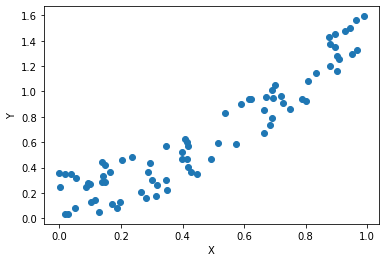

In [36]:
plt.scatter(X_train,y_train)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

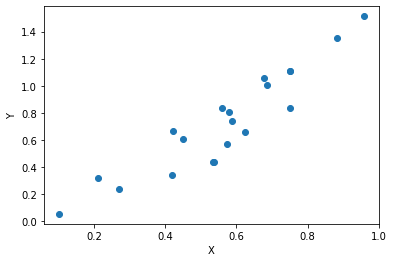

In [38]:
plt.scatter(X_test,y_test)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [41]:
degree= 5 
# make pipeline is a sequence of model
# sequence : create polynomial features, scale, train(fit)
from sklearn.pipeline import make_pipeline
polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
polyreg_scaled.fit(X_train, y_train)
display(polyreg_scaled.score(X_train, y_train))
display(polyreg_scaled.score(X_test, y_test))

0.9214962587812688

0.8656262710391982

In [44]:
degree= 30
from sklearn.pipeline import make_pipeline
polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
polyreg_scaled.fit(X_train, y_train)
display(polyreg_scaled.score(X_train, y_train))
display(polyreg_scaled.score(X_test, y_test))

0.9389468126989817

0.8096586844637852

In [47]:
degree= 1
# make pipeline is a sequence of model
# sequence : create polynomial features, scale, train(fit)
from sklearn.pipeline import make_pipeline
polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
polyreg_scaled.fit(X_train, y_train)
display(polyreg_scaled.score(X_train, y_train))
display(polyreg_scaled.score(X_test, y_test))

0.8740205794555178

0.8073308228555811

In [49]:
degrees = 32
train_scores = []
test_scores = []
for degree in range(1, degrees):
    polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
    polyreg_scaled.fit(X_train, y_train)
    train_score = polyreg_scaled.score(X_train, y_train)
    test_score = polyreg_scaled.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

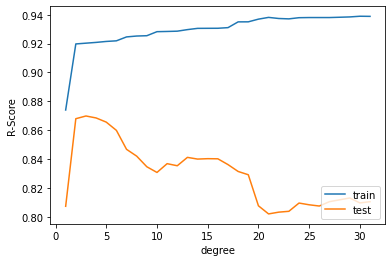

In [50]:
plt.figure()
plt.plot(list(range(1, 32)), train_scores, label='train')
plt.plot(list(range(1,32)), test_scores, label='test')
plt.legend(loc='lower right')
plt.xlabel("degree") 
plt.ylabel("R-Score")
plt.show()

In [51]:
from sklearn.model_selection import KFold

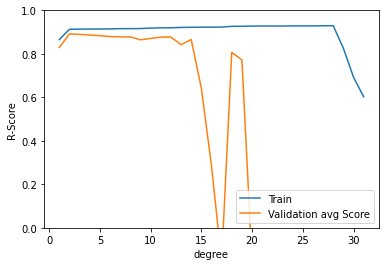

In [58]:
kf = KFold(n_splits=10, shuffle=True, random_state=1)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

degrees = 32
train_scores = []
test_scores = []

for degree in range(1, degrees):
    fold_train_scores = []
    fold_test_scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
        polyreg_scaled.fit(X_train, y_train)
        train_score = polyreg_scaled.score(X_train, y_train)
        test_score = polyreg_scaled.score(X_test, y_test)
        fold_train_scores.append(train_score)
        fold_test_scores.append(test_score)
    train_score = np.mean(fold_train_scores)
    test_score = np.mean(fold_test_scores)
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.figure()
plt.plot(list(range(1, 32)),train_scores, label="Train")
plt.plot(list(range(1, 32)),test_scores, label="Validation avg Score")
plt.legend(loc="lower right")
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('R-Score')
plt.show()

In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

np.random.seed(1)
X = np.random.rand(100,1)
y = 2.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(100,1)

degree = 4
poly = PolynomialFeatures(degree)
x_poly = poly.fit_transform(X)
x_poly_scaled = scaler.fit_transform(x_poly)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_poly_scaled, y, test_size=0.2, random_state=1)

linear = LinearRegression()
linear.fit(X_train, y_train)
print("Linear Model Coef")
print(linear.coef_)

# L1 regurlatization
lass = Lasso(alpha = 1)
lass.fit(X_train, y_train)
print("Lasso Regression Coefficients")
print(lass.coef_)

#L2 Regularization
ridg = Ridge(alpha=1)
ridg.fit(X_train, y_train)
print("Ridge regression coefficient")
print(ridg.coef_)

elastic = ElasticNet(alpha = 1)
elastic.fit(X_train, y_train)
print("Elasitc Regression coefficients")
print(elasitc.coef_)

print("Train Perfomance")
print("Linear R-Square:", linear.score(X_train, y_train))
print("Ridge Regression:", ridg.score(X_train, y_train))
print("Lasso Regression", lass.score(X_train, y_train))
print("Elasitc Regression:", elastic.score(X_train, y_train))

print("Test Performance")
print("Linear R-Square:", linear.score(X_test, y_test))
print("Ridge Regression:", ridg.score(X_test, y_test))
print("Lasso Regression", lass.score(X_test, y_test))
print("Elasitc Regression:", elastic.score(X_test, y_test))

Linear Model Coef
[[ 0.         -0.25776169  1.78454472 -2.459086    1.82053072]]
Lasso Regression Coefficients
[0. 0. 0. 0. 0.]
Ridge regression coefficient
[[0.         0.04144604 0.14356706 0.27229445 0.41982774]]
Elasitc Regression coefficients
[0.         0.02002424 0.09973098 0.12161947 0.12098465]
Train Perfomance
Linear R-Square: 0.982001271504914
Ridge Regression: 0.9810064520379694
Lasso Regression 0.0
Elasitc Regression: 0.640046917069915
Test Performance
Linear R-Square: 0.9663559896350552
Ridge Regression: 0.966524608045983
Lasso Regression -0.0027215061847434274
Elasitc Regression: 0.6071462397164342
